**Better heat maps and correlation matrix plots**


---
* **Note:** Make sure there are no categorical features left before doing this

---


Learned from better heat maps and correlation article on Medium

https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec

# Import CLEANED data

In [1]:
# Import libraries

import pandas as pd
from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 7,7 
import seaborn as sns
import numpy as np
sns.set(color_codes=True, font_scale=1.2)

In [2]:
# Import data - using the Kaggle House Price competition training set for this example

data = pd.read_csv('train.csv')
#data.head(5)
#data.describe()
#list(data.columns)

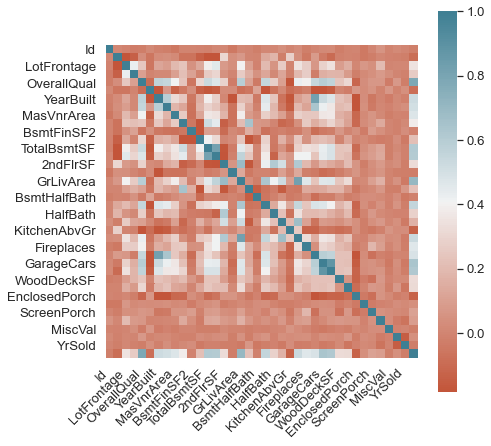

In [3]:
# Calculate column correlations and make a seaborn heatmap

corr = data.corr()
ax = sns.heatmap(
    corr, 
    #vmin=-1, vmax=1, center=0,
    robust=1,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);



###########################################################################################



**How do I print something like an ANOVA that gives NUMERIC absolute size of correlations?**

This plot is pretty, but hard to interpret with so many variables



#############################################################################################

# Make cell size proportional to correlation

Can only do this practically with small subset of variables.  Need to do feature engineering or feature selection before this.



In [4]:
def get_redundant_pairs(df):
    #Get diagonal and lower triangular pairs of correlation matrix
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

au_corr = data.corr().abs()#.unstack() # a multi-index object - see https://jakevdp.github.io/PythonDataScienceHandbook/03.05-hierarchical-indexing.html
labels_to_drop = get_redundant_pairs(data) # a set
#labels_to_drop
#print(get_redundant_pairs(data))
#def get_top_abs_correlations(df, n=5):
#    au_corr = data.corr().abs().unstack()
    
    
#    labels_to_drop = get_redundant_pairs(data)
#    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)

    #    return au_corr[0:n]

In [8]:
#print(type(au_corr))
#au_corr.head()
#x={('Electrical', 'Heating')}
data['Heating']

#for x in labels_to_drop:
#x=('Electrical', 'Heating')
#print(au_corr[x])
#au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)

#print(get_redundant_pairs(data))

0       GasA
1       GasA
2       GasA
3       GasA
4       GasA
        ... 
1455    GasA
1456    GasA
1457    GasA
1458    GasA
1459    GasA
Name: Heating, Length: 1460, dtype: object

In [ ]:
#print("Data Frame")
#print(data)
#print()

#print("Correlation Matrix")
#print(data.corr())
#print()

def get_redundant_pairs(df):
    #Get diagonal and lower triangular pairs of correlation matrix''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]


print("Top Absolute Correlations")
print(get_top_abs_correlations(data, 3))

In [ ]:
# Make a scatter plot with square markers, set column names as labels

def heatmap(x, y, size):
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    
columns = ['GarageCars', 'WoodDeckSF', '1stFlrSF', 'EnclosedPorch', 'LotFrontage', 'KitchenAbvGr'] 
corr = data[columns].corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs()
)

In [ ]:
# Fix gridlines, centre blocks

ax.grid(False, 'major')
ax.grid(True, 'minor')
ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)

# Centre axes

ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5]) 
ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])


# Now plot

n_colors = 256 # Use 256 colors for the diverging color palette
palette = sns.diverging_palette(20, 220, n=n_colors) # Create the palette
color_min, color_max = [-1, 1] # Range of values that will be mapped to the palette, i.e. min and max possible correlation

def value_to_color(val):
    val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
    ind = int(val_position * (n_colors - 1)) # target index in the color palette
    return palette[ind]

ax.scatter(
    x=x.map(x_to_num),
    y=y.map(y_to_num),
    s=size * size_scale,
    c=color.apply(value_to_color), # Vector of square color values, mapped to color palette
    marker='s'
)

